In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import copy

In [3]:
house_csv = '/content/data/kc_house_data.csv'
df = pd.read_csv(house_csv)
selected =  ['price', 'sqft_living', 'sqft_lot', 'bathrooms', 
          'bedrooms', 'grade']
df = df[selected]

In [4]:
predictors = ['sqft_living', 'sqft_lot', 'bathrooms', 
          'bedrooms', 'grade']
outcome = ['price']
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[outcome], test_size=0.2, random_state=42)


In [5]:
model = linear_model.LinearRegression()
predictor = model.fit(X_train, y_train)

In [6]:
def minMax(x):
  return pd.Series(index=['max', 'min'], data=[max(x), min(x)])

X_train.apply(minMax)

,sqft_living,sqft_lot,bathrooms,bedrooms,grade
max,12050,1164794,8.0,33,13
min,290,520,0.0,0,1


#Feature Scaling 

In [7]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())

In [8]:
X_train.apply(minMax)

,sqft_living,sqft_lot,bathrooms,bedrooms,grade
max,1.0,1.0,1.0,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0


In [9]:
X = X_train.to_numpy()
y = y_train.to_numpy()

In [10]:
w = np.array([23, 23 ,23 ,23 ,23])
b = 89.0


In [11]:
def CostValuation(X,y,w,b):
  entities = len(X)
  cost = 0
  for entity in range(entities):
    YPredict = np.dot(X[entity], w) + b
    cost += (YPredict - y[entity])**2
  cost = cost/ (2*entities)
  return cost

In [12]:
def SpecificGradient(X,y,w,b):
  n = X.shape[0]
  parameters = X.shape[1]
  derWithW = np.zeros((parameters,))
  derWithB = 0
  for i in range(n):
    error  = (np.dot(X[i], w) + b) - y[i]
    for j in range(parameters):
      derWithW[j] += error * X[i,j]
    derWithB += error
    
  derWithW = derWithW/n
  derWithB = derWithB/n

  return derWithW, derWithB

In [13]:
def GradientDescent(X,y,wInitial, bInitial,CostValuation,SpecificGradient, learnRate, epochs):
  costList = []
  w = copy.deepcopy(wInitial)
  b = copy.deepcopy(bInitial)

  for epoch in range(epochs):
    derWithW, derWithB = SpecificGradient(X,y,w,b)

    w = w - learnRate * derWithW
    b = b - learnRate * derWithB

    cost = CostValuation(X,y,w,b)[0]
    costList.append(cost)
    if(epoch%(epochs/10)==0):
      print(f"Epoch:{epoch} at Cost: {cost:8.2f}")

  return w, b, costList

In [14]:
# CostValuation(X, y, w , b)
# SpecificGradient(X,y,w,b)[0]

In [15]:
w,b,cost = GradientDescent(X,y,w,b,CostValuation, SpecificGradient, 0.01, epochs=1000)

Epoch:0 at Cost: 205571020314.04
Epoch:100 at Cost: 65449100456.43
Epoch:200 at Cost: 56709163301.95
Epoch:300 at Cost: 55571358423.75
Epoch:400 at Cost: 54890982145.75
Epoch:500 at Cost: 54255106985.99
Epoch:600 at Cost: 53639356156.68
Epoch:700 at Cost: 53041795024.03
Epoch:800 at Cost: 52461800152.28
Epoch:900 at Cost: 51898839220.84


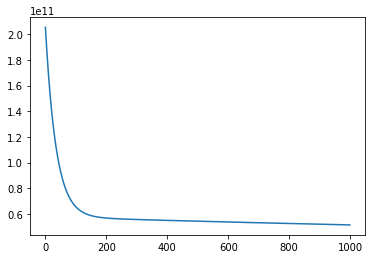

In [16]:
plt.plot(cost)
plt.show()